# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [47]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [48]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [49]:
# 1. Load the dataset
titanic = load_dataset("titanic")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [50]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titanic.shape)
print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
titanic["age"].fillna(titanic["age"].mean(), inplace=True)

(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\DiaaAlHariri\AppData\Local\Temp\ipykernel_19828\811514065.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].mean(), inplace=True)


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


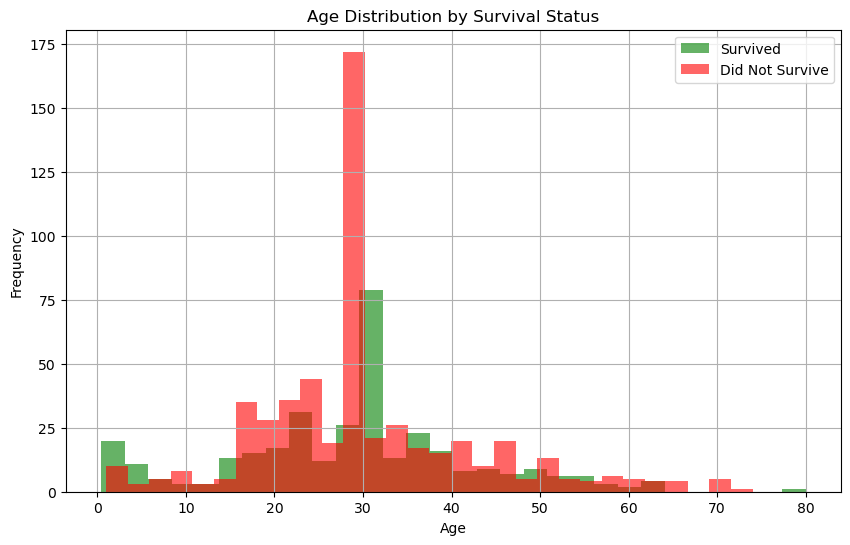

embarked
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64
sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


In [52]:
# 3 Analyse data
# Survival rate by passenger class
pclass_survival = titanic.groupby("pclass")["survived"].mean()
print(pclass_survival)

# Survival rate by gender
gender_survival = titanic.groupby("sex")["survived"].mean()
print(gender_survival)

# Age distribution for survivors and non-survivors
plt.figure(figsize=(10, 6))
titanic[titanic["survived"] == 1]["age"].hist(bins=30, alpha=0.6, label="Survived", color="green")
titanic[titanic["survived"] == 0]["age"].hist(bins=30, alpha=0.6, label="Did Not Survive", color="red")
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Replace 'embarked' codes with actual town names
titanic['embarked'] = titanic['embarked'].map(embarked_labels)

# Survival rate by embarkation town
embarked_survival = titanic.groupby("embarked")["survived"].mean()
print(embarked_survival)


# Survival rate by number of siblings/spouses aboard
sibsp_survival = titanic.groupby("sibsp")["survived"].mean()
print(sibsp_survival)


sex
female    233
male      109
Name: count, dtype: int64
sex
female    68.128655
male      31.871345
Name: proportion, dtype: float64
pclass
1    136
3    119
2     87
Name: count, dtype: int64
pclass
1    39.766082
3    34.795322
2    25.438596
Name: proportion, dtype: float64


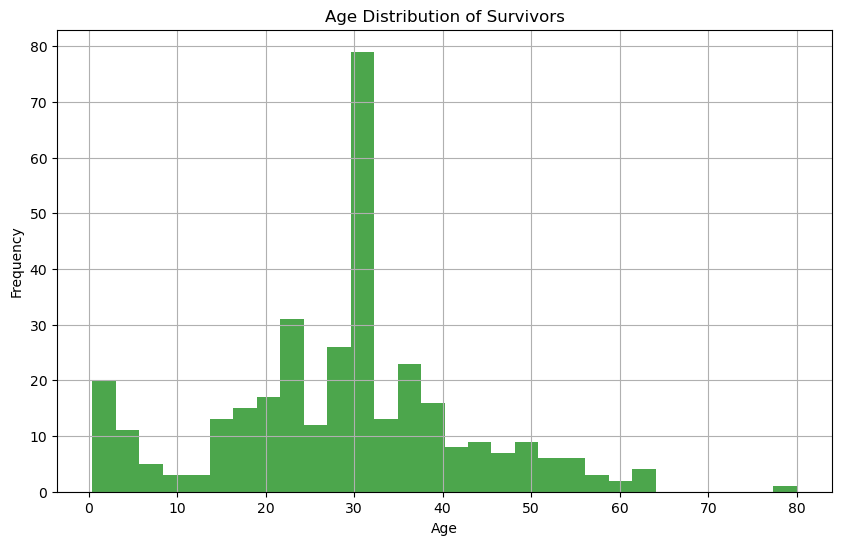

embarked
Southampton    217
Cherbourg       93
Queenstown      30
Name: count, dtype: int64
embarked
Southampton    63.823529
Cherbourg      27.352941
Queenstown      8.823529
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

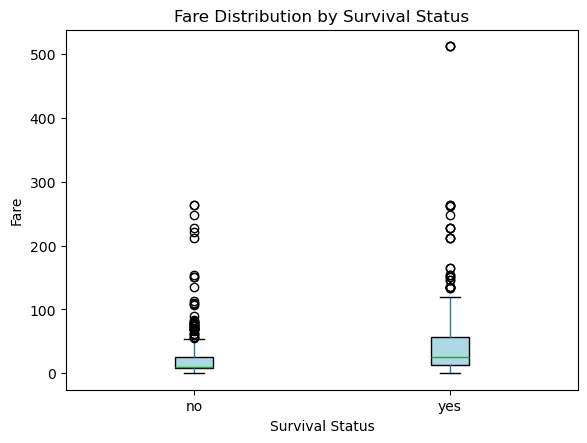

In [53]:
# 4 Alives analyse

# Count and percentage of survivors by gender
alive_gender_distribution = titanic[titanic["alive"] == "yes"]["sex"].value_counts()
alive_gender_percentage = titanic[titanic["alive"] == "yes"]["sex"].value_counts(normalize=True) * 100

print(alive_gender_distribution)
print(alive_gender_percentage)

# Count and percentage of survivors by passenger class
alive_pclass_distribution = titanic[titanic["alive"] == "yes"]["pclass"].value_counts()
alive_pclass_percentage = titanic[titanic["alive"] == "yes"]["pclass"].value_counts(normalize=True) * 100

print(alive_pclass_distribution)
print(alive_pclass_percentage)

# Age distribution of survivors
plt.figure(figsize=(10, 6))
titanic[titanic["alive"] == "yes"]["age"].hist(bins=30, alpha=0.7, color='green')
plt.title("Age Distribution of Survivors")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Count and percentage of survivors by embarkation town
alive_embarked_distribution = titanic[titanic["alive"] == "yes"]["embarked"].value_counts()
alive_embarked_percentage = titanic[titanic["alive"] == "yes"]["embarked"].value_counts(normalize=True) * 100

print(alive_embarked_distribution)
print(alive_embarked_percentage)


# Boxplot of fare by survival status
plt.figure(figsize=(10, 6))
titanic.boxplot(column="fare", by="alive", grid=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Fare Distribution by Survival Status")
plt.suptitle("")  # Removes automatic title
plt.xlabel("Survival Status")
plt.ylabel("Fare")
plt.show()


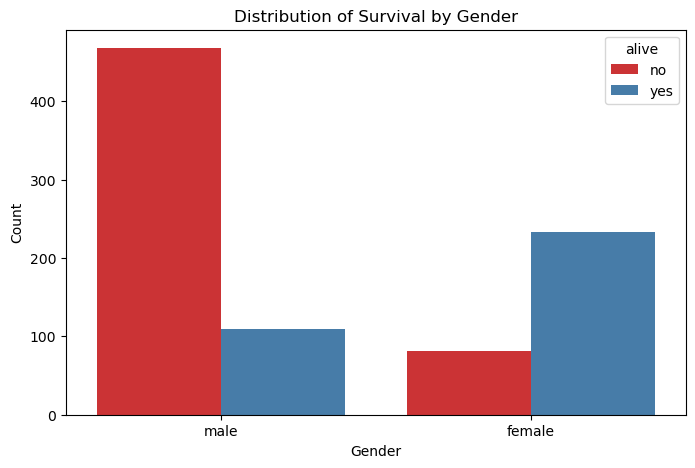

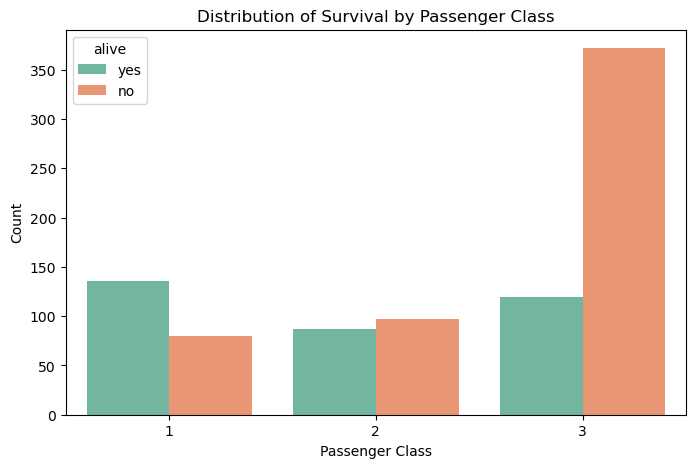

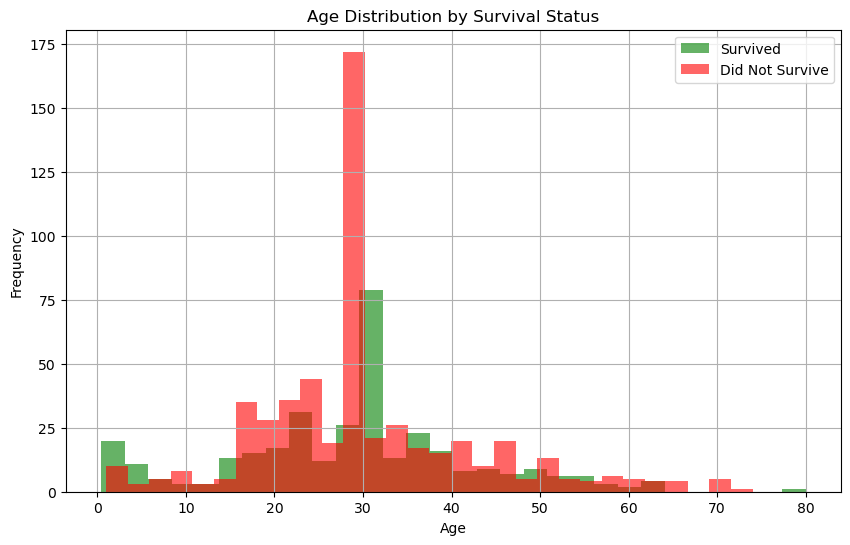

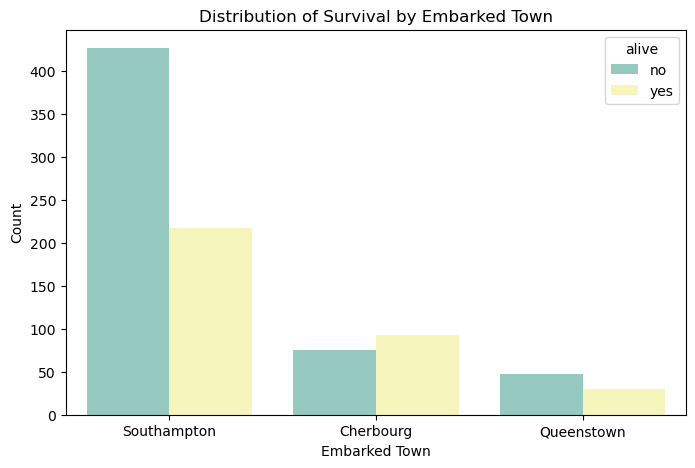

In [62]:
# 5 Plottings

# رسم بياني يوضح عدد الناجين حسب الجنس
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x="sex", hue="alive", data=titanic, palette="Set1")
plt.title("Distribution of Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



# رسم بياني يوضح عدد الناجين حسب فئة التذكرة
plt.figure(figsize=(8, 5))
sns.countplot(x="pclass", hue="alive", data=titanic, palette="Set2")
plt.title("Distribution of Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()



# رسم بياني يوضح توزيع الأعمار بين الناجين وغير الناجين
plt.figure(figsize=(10, 6))
titanic[titanic["survived"] == 1]["age"].hist(bins=30, alpha=0.6, label="Survived", color="green")
titanic[titanic["survived"] == 0]["age"].hist(bins=30, alpha=0.6, label="Did Not Survive", color="red")
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# رسم بياني يوضح عدد الناجين حسب ميناء الصعود
plt.figure(figsize=(8, 5))
sns.countplot(x="embarked", hue="alive", data=titanic, palette="Set3")
plt.title("Distribution of Survival by Embarked Town")
plt.xlabel("Embarked Town")
plt.ylabel("Count")
plt.show()




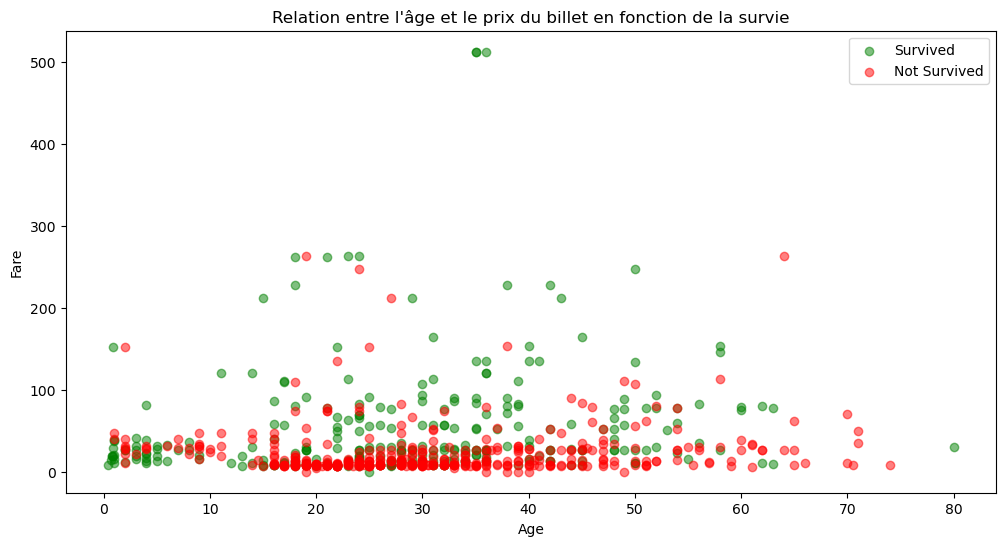

In [74]:
# Charger le dataset "titanic" à partir de Seaborn
titanic_dataset = load_dataset('titanic')

# Afficher les premières lignes du dataset

# Obtenir un résumé statistique du dataset

# Nettoyage des données : nous devons gérer les valeurs manquantes pour Age et Fare
# On peut choisir de remplir les valeurs manquantes avec la médiane pour Age et Fare

# Créer un nuage de points pour Age vs Fare en fonction de la survie
plt.figure(figsize=(12, 6))

# Scatter plot pour les passagers ayant survécu
plt.scatter(titanic_dataset[titanic_dataset['survived'] == 1]['age'],
            titanic_dataset[titanic_dataset['survived'] == 1]['fare'],
            c='green', label='Survived', alpha=0.5)

# Scatter plot pour les passagers n'ayant pas survécu
plt.scatter(titanic_dataset[titanic_dataset['survived'] == 0]['age'],
            titanic_dataset[titanic_dataset['survived'] == 0]['fare'],
            c='red', label='Not Survived', alpha=0.5)

# Ajouter des labels et un titre
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relation entre l\'âge et le prix du billet en fonction de la survie')
plt.legend()

# Afficher le graphique
plt.show()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


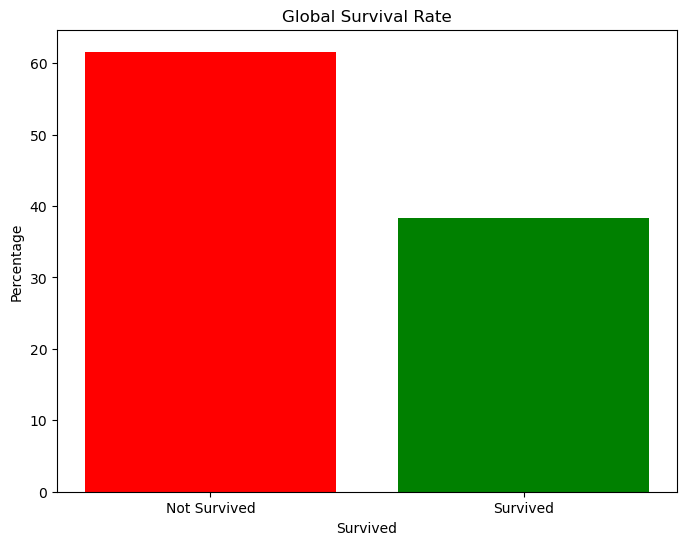

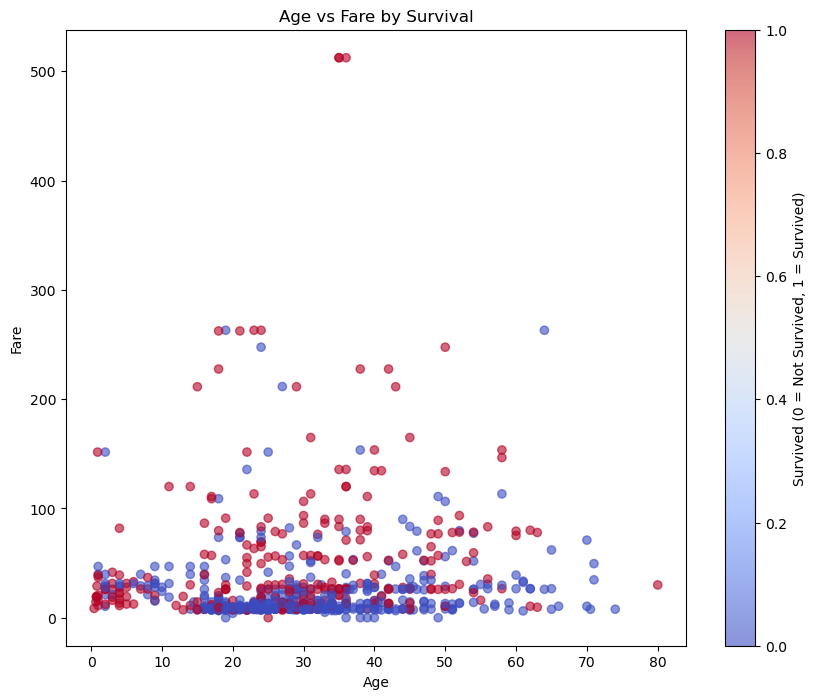

In [79]:
# Charger le dataset Titanic
titanic_dataset = load_dataset('titanic')

# Afficher les premières lignes du dataset pour inspection
print(titanic_dataset.head())



# Calculer le taux de survie
survival_rate = titanic_dataset['survived'].value_counts(normalize=True) * 100

# Créer un diagramme à barres pour visualiser le taux de survie
plt.figure(figsize=(8, 6))
plt.bar(survival_rate.index.map({0: 'Not Survived', 1: 'Survived'}), survival_rate, color=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.title('Global Survival Rate')
plt.show()

# Créer un nuage de points pour Age vs Fare en fonction de la survie
plt.figure(figsize=(10, 8))
scatter = plt.scatter(titanic_dataset['age'], titanic_dataset['fare'], c=titanic_dataset['survived'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Survived (0 = Not Survived, 1 = Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Survival')
plt.show()




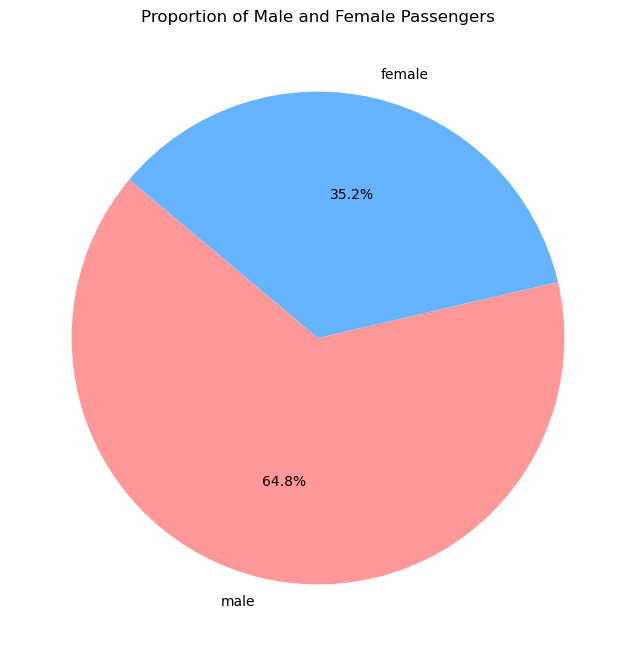

In [84]:


# Créer un diagramme circulaire pour montrer la proportion de passagers masculins et féminins
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Proportion of Male and Female Passengers')
plt.show()